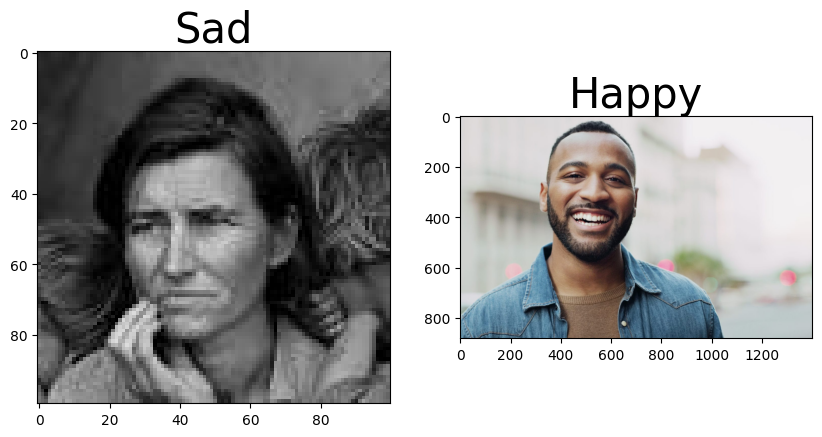

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.conv1 = nn.Conv2d(1,32,5) # 1 input image channel, 32 output channels, 5x5 square convolution kernel
        self.conv2 = nn.Conv2d(32,64,5) # 32 input image channel, 64 output channels, 5x5 square convolution kernel
        self.conv3 = nn.Conv2d(64,128,5) # 64 input image channel, 128 output channels, 5x5 square convolution kernel

        x = torch.randn(50,50).view(-1, 1, 50, 50)
        self._to_linear = None
        self.convs(x)
        self.fc1 = nn.Linear(self._to_linear,512) #  input features, 512 output features
        self.fc2 = nn.Linear(512,2) # 512 input features, 2 output features
    
    def convs(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2)) # Max pooling over a (2,2) window
        x = F.max_pool2d(F.relu(self.conv2(x)),(2,2)) # Max pooling over a (2,2) window
        x = F.max_pool2d(F.relu(self.conv3(x)),(2,2)) # Max pooling over a (2,2) window

        # print(x[0].shape)
        if self._to_linear is None:
            sh = x[0].shape
            self._to_linear = sh[0]*sh[1]*sh[2]
        return x
    
    def forward(self,x):
        x = self.convs(x)
        x = x.view(-1,self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x,dim=1) # activation function
    

# Loading Model
net = torch.load("model.pth")
device = torch.device("cuda")
# Subplot each time the function is called
plt.figure(figsize=(10,10))
def get_output(imgs):
    output = []
    for img in imgs:
        test1 = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
        test1 = cv2.resize(test1,(50,50))
        test1 = torch.Tensor(test1).view(-1,1,50,50).to(device)
        test1 = test1/255.0
        output.append(torch.argmax(net(test1)))
    for img in imgs:
        tmp = img
        plt.subplot(1,len(imgs),imgs.index(tmp)+1)
        img = plt.imread(img)
        plt.imshow(img)
        plt.title("Happy" if output[imgs.index(tmp)] == 0 else "Sad",fontsize=30)
    plt.show()


get_output(["test1.jpeg","test2.jpg"])